In [4]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact, Dropdown, IntSlider
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

In [5]:
ss_data = pd.read_excel("US Superstore data.xls")
ss_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
print("Dataset Shape:",ss_data.shape)
print("\n Column names:")
print(ss_data.columns.tolist())

Dataset Shape: (9994, 21)

 Column names:
['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']


In [7]:
print("Duplicate rows:", ss_data.duplicated().sum()) # Check for duplicates
ss_data = ss_data.drop_duplicates() # Remove duplicates if any
print("\nMissing values per column:")
print(ss_data.isnull().sum()) #handle missing values

Duplicate rows: 0

Missing values per column:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [8]:
ss_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [9]:
ss_data.describe(include = "all").transpose()

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Row ID,9994.0,NaN,NaN,NaN,4997.5,1.0,2499.25,4997.5,7495.75,9994.0,2885.163629
Order ID,9994,5009,CA-2017-100111,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Order Date,9994,NaN,NaN,NaN,2016-04-30 00:07:12.259355648,2014-01-03 00:00:00,2015-05-23 00:00:00,2016-06-26 00:00:00,2017-05-14 00:00:00,2017-12-30 00:00:00,NaN
Ship Date,9994,NaN,NaN,NaN,2016-05-03 23:06:58.571142912,2014-01-07 00:00:00,2015-05-27 00:00:00,2016-06-29 00:00:00,2017-05-18 00:00:00,2018-01-05 00:00:00,NaN
Ship Mode,9994,4,Standard Class,5968,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer ID,9994,793,WB-21850,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Name,9994,793,William Brown,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Segment,9994,3,Consumer,5191,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,9994,1,United States,9994,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,9994,531,New York City,915,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
print("Duplicate rows:", ss_data.duplicated().sum()) # Check for duplicates
ss_data = ss_data.drop_duplicates() # Remove duplicates if any
print("\nMissing values per column:")
print(ss_data.isnull().sum()) #handle missing values

Duplicate rows: 0

Missing values per column:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [11]:
if 'Postal Code' in ss_data.columns:
    ss_data['Postal Code'] = ss_data['Postal Code'].fillna(0) #Fill missing postal codes with 0 or remove rows

In [12]:
ss_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [13]:
ss_data.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

Create an interactive line chart to show sales trends over the years.

In [14]:
ss_data['Order Year'] = ss_data['Order Date'].dt.year
yearly_sales = (ss_data.groupby(["Order Year", "Category"], as_index=False)["Sales"].sum().sort_values("Order Year"))

yearly_sales.head()

,Order Year,Category,Sales
0,2014,Furniture,157192.8531
1,2014,Office Supplies,151776.4120
2,2014,Technology,175278.2330
3,2015,Furniture,170518.2370
4,2015,Office Supplies,137233.4630


In [15]:
import matplotlib.pyplot as plt
import plotly.express as px
import ipywidgets as widgets
from ipywidgets import interact, Dropdown, fixed
from IPython.display import display

def plot_yearly_sales_interactive(ss_data: pd.DataFrame, category='All'):
    df = ss_data.copy()
    df["Order Date"] = pd.to_datetime(df["Order Date"], errors="coerce")
    df = df.dropna(subset=["Order Date"])
    df["Order Year"] = df["Order Date"].dt.year

    if category == "All":
        yearly = (df.groupby(["Order Year","Category"], as_index=False)["Sales"]
                    .sum().sort_values("Order Year"))
        fig = px.line(yearly, x="Order Year", y="Sales", color="Category",
                      markers=True, title="Yearly Sales by Category (Interactive)")
    else:
        yearly = (df[df["Category"]==category]
                    .groupby("Order Year", as_index=False)["Sales"]
                    .sum().sort_values("Order Year"))
        fig = px.line(yearly, x="Order Year", y="Sales", markers=True,
                      title=f"Yearly Sales — {category} (Interactive)")

    fig.update_layout(hovermode="x unified", xaxis_title="Year", yaxis_title="Sales ($)",
                      xaxis=dict(dtick=1, rangeslider=dict(visible=True)))
    fig.update_yaxes(tickprefix="$", separatethousands=True)
    fig.show()

In [16]:
categories = ['All'] + list(ss_data['Category'].dropna().unique())
category_dropdown = Dropdown(options=categories, value='All', description='Category:')
interact(plot_yearly_sales_interactive,
         ss_data=fixed(ss_data),  
         category=category_dropdown)

interactive(children=(Dropdown(description='Category:', options=('All', 'Furniture', 'Office Supplies', 'Techn…

<function __main__.plot_yearly_sales_interactive(ss_data: pandas.core.frame.DataFrame, category='All')>

In [17]:
%pip install -U nbformat


Note: you may need to restart the kernel to use updated packages.


In [18]:
# pip install plotly
import pandas as pd
import plotly.express as px

# 1) Aggregate sales by US state (full state names)
state_sales = (
    ss_data.assign(Sales=pd.to_numeric(ss_data["Sales"], errors="coerce"))
           .dropna(subset=["State","Sales"])
           .groupby("State", as_index=False)["Sales"].sum()
)

# 2) Map state names -> two-letter codes (needed for USA choropleth)
us_state_abbrev = {
    'Alabama':'AL','Alaska':'AK','Arizona':'AZ','Arkansas':'AR','California':'CA',
    'Colorado':'CO','Connecticut':'CT','Delaware':'DE','District of Columbia':'DC','Florida':'FL',
    'Georgia':'GA','Hawaii':'HI','Idaho':'ID','Illinois':'IL','Indiana':'IN',
    'Iowa':'IA','Kansas':'KS','Kentucky':'KY','Louisiana':'LA','Maine':'ME',
    'Maryland':'MD','Massachusetts':'MA','Michigan':'MI','Minnesota':'MN','Mississippi':'MS',
    'Missouri':'MO','Montana':'MT','Nebraska':'NE','Nevada':'NV','New Hampshire':'NH',
    'New Jersey':'NJ','New Mexico':'NM','New York':'NY','North Carolina':'NC','North Dakota':'ND',
    'Ohio':'OH','Oklahoma':'OK','Oregon':'OR','Pennsylvania':'PA','Rhode Island':'RI',
    'South Carolina':'SC','South Dakota':'SD','Tennessee':'TN','Texas':'TX','Utah':'UT',
    'Vermont':'VT','Virginia':'VA','Washington':'WA','West Virginia':'WV','Wisconsin':'WI','Wyoming':'WY'
}
state_sales["StateCode"] = state_sales["State"].map(us_state_abbrev)
state_sales = state_sales.dropna(subset=["StateCode"])

# 3) Interactive choropleth (US only)
fig = px.choropleth(
    state_sales,
    locations="StateCode",
    locationmode="USA-states",
    scope="usa",
    color="Sales",
    hover_name="State",
    title="US Superstore — Sales by State (Interactive)"
)
fig.update_coloraxes(colorbar_title="Sales ($)")
fig.update_traces(hovertemplate="<b>%{hovertext}</b><br>Sales: $%{z:,.0f}<extra></extra>")


fig.show()


Use Seaborn to generate a bar chart showing top 10 products by sales.

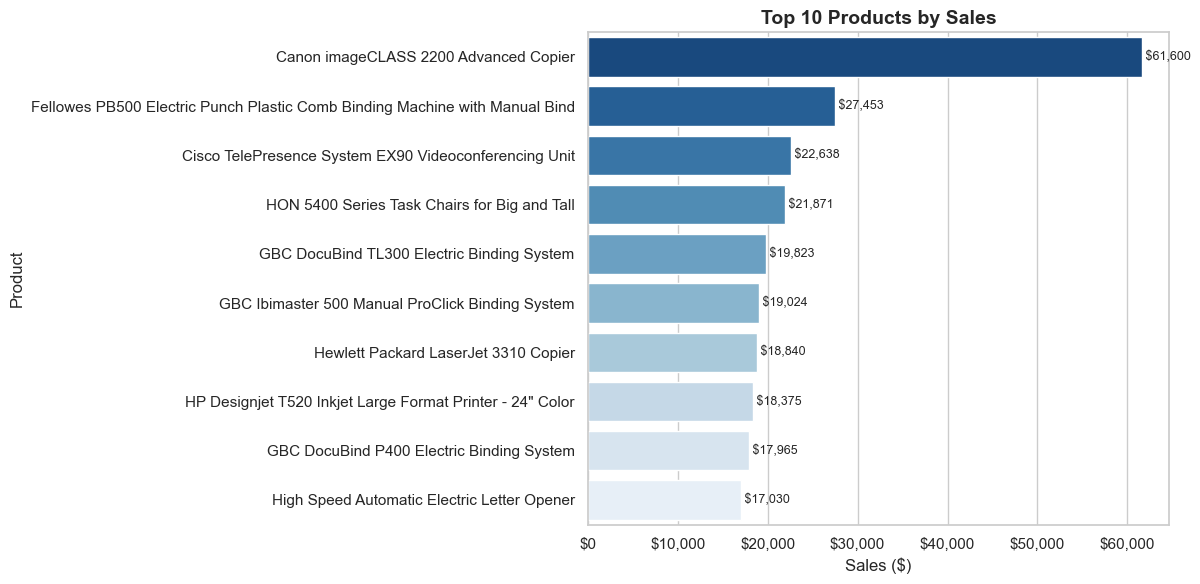

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

top10_products_sales = ss_data.groupby("Product Name")["Sales"].sum().reset_index().sort_values(by="Sales", ascending=False).head(10)
sns.set_theme(style="whitegrid")

# sort ascending so the biggest bar appears at the top
df = top10_products_sales.sort_values("Sales", ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df, x="Sales", y="Product Name", palette="Blues_r")

ax.set_title("Top 10 Products by Sales", fontsize=14, fontweight="bold")
ax.set_xlabel("Sales ($)")
ax.set_ylabel("Product")
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter("${x:,.0f}"))

# value labels at the end of each bar
for i, v in enumerate(df["Sales"]):
    ax.text(v, i, f" ${v:,.0f}", va="center", ha="left", fontsize=9)

plt.tight_layout()
plt.show()

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter, StrMethodFormatter

sns.set_theme(style="whitegrid")

def seaborn_scatter_profit_vs_discount(ss_data):
    df = ss_data.copy()
    df["Discount"] = pd.to_numeric(df["Discount"], errors="coerce")
    df["Profit"]   = pd.to_numeric(df["Profit"],   errors="coerce")
    df = df.dropna(subset=["Discount", "Profit"])

    plt.figure(figsize=(9, 6))
    ax = sns.scatterplot(data=df, x="Discount", y="Profit", alpha=0.5, s=40)
    # add a smooth (LOWESS-like) trend without shading
    sns.regplot(data=df, x="Discount", y="Profit", scatter=False, lowess=True, color="black", ax=ax)

    ax.axhline(0, ls="--", lw=1, color="gray")
    ax.set_title("Profit vs Discount (Seaborn)", fontsize=14, fontweight="bold")
    ax.set_xlabel("Discount")
    ax.set_ylabel("Profit ($)")

    # nice axis formatting
    if df["Discount"].max() <= 1.5:   # treat as 0–1 → %
        ax.xaxis.set_major_formatter(PercentFormatter(1.0))
    ax.yaxis.set_major_formatter(StrMethodFormatter("${x:,.0f}"))

    plt.tight_layout()
    plt.show()


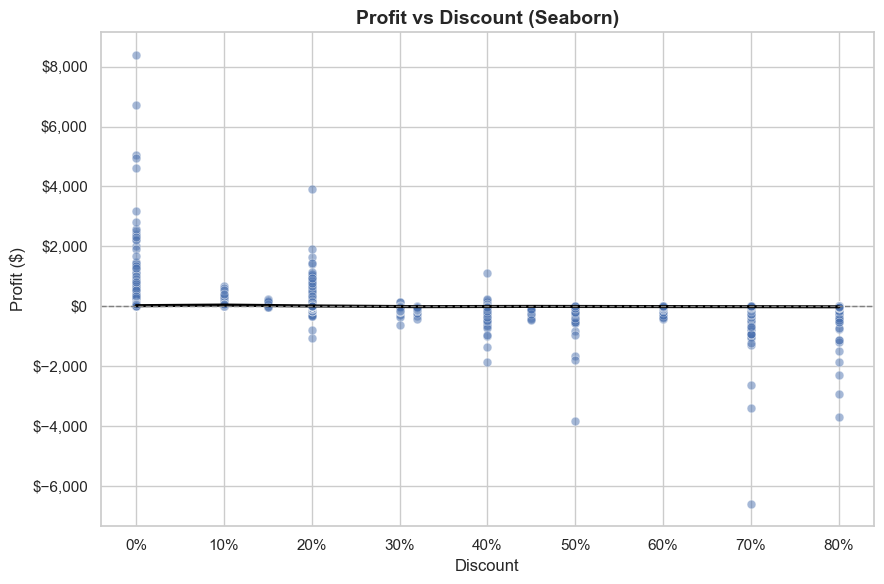

In [24]:
seaborn_scatter_profit_vs_discount(ss_data)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter, StrMethodFormatter

def scatter_profit_vs_discount(ss_data):
    df = ss_data.copy()
    for col in ["Discount", "Profit"]:
        df[col] = pd.to_numeric(df[col], errors="coerce")
    df = df.dropna(subset=["Discount", "Profit"])

    plt.figure(figsize=(8, 6))
    plt.scatter(df["Discount"], df["Profit"], s=25, alpha=0.5)

    # optional trend line
    x = df["Discount"].values
    y = df["Profit"].values
    m, b = np.polyfit(x, y, 1)
    xx = np.linspace(x.min(), x.max(), 200)
    plt.plot(xx, m*xx + b, linewidth=2)

    # reference line at zero profit
    plt.axhline(0, linestyle="--", linewidth=1)

    plt.title("Profit vs Discount")
    plt.xlabel("Discount")
    plt.ylabel("Profit ($)")

    # format axes nicely
    if df["Discount"].max() <= 1.5:  # treat as 0–1 fraction -> show %
        plt.gca().xaxis.set_major_formatter(PercentFormatter(1.0))
    plt.gca().yaxis.set_major_formatter(StrMethodFormatter("${x:,.0f}"))

    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

   

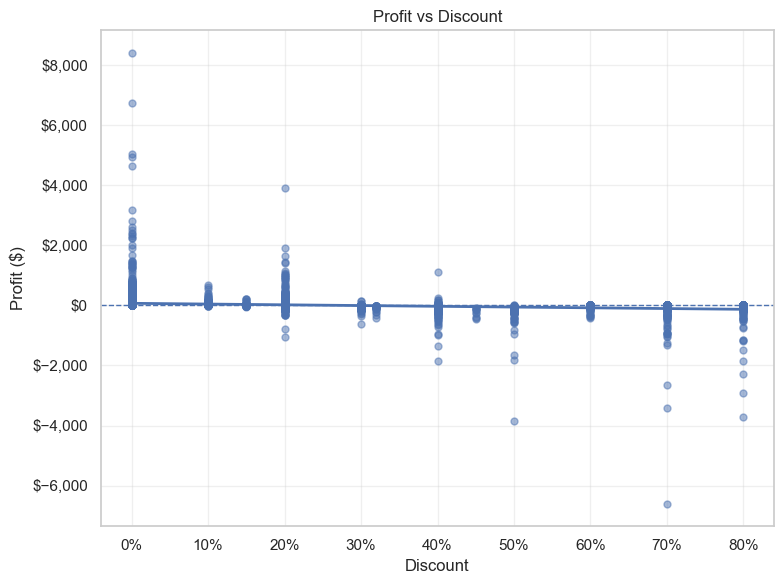

In [22]:
scatter_profit_vs_discount(ss_data)

In [31]:
print("\n===Seaborn vs Matplotlib===")
print("\n- Ease of use: Seaborn is higher-level (fewer lines, nice defaults); Matplotlib is lower-level (more control).")

print("- Seaborn shines for fast EDA—built-in hue/size/style, easy trend lines.")

print("- Customization: Matplotlib wins for fine-grained styling and complex layouts.")

print("- Aesthetics: Seaborn’s themes/palettes look good out of the box; Matplotlib needs more manual styling.")

print("- Best use: Seaborn for speed/clarity; Matplotlib for precise control.")


===Seaborn vs Matplotlib===

- Ease of use: Seaborn is higher-level (fewer lines, nice defaults); Matplotlib is lower-level (more control).
- Seaborn shines for fast EDA—built-in hue/size/style, easy trend lines.
- Customization: Matplotlib wins for fine-grained styling and complex layouts.
- Aesthetics: Seaborn’s themes/palettes look good out of the box; Matplotlib needs more manual styling.
- Best use: Seaborn for speed/clarity; Matplotlib for precise control.
